# Experiments with MNIST and mapper classsifier

In [1]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.datasets import mnist
from contextlib import contextmanager
from timeit import default_timer

@contextmanager
def elapsed_timer():
    start = default_timer()
    elapser = lambda: default_timer() - start
    yield lambda: elapser()
    end = default_timer()
    elapser = lambda: end-start

Using TensorFlow backend.


## Load MNIST data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Dense NN classifier

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.9044 - val_loss: 0.1931 - val_accuracy: 0.9455
Epoch 2/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1624 - accuracy: 0.9535 - val_loss: 0.1344 - val_accuracy: 0.9603
Epoch 3/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1173 - accuracy: 0.9668 - val_loss: 0.1121 - val_accuracy: 0.9669
Epoch 4/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9730 - val_loss: 0.0965 - val_accuracy: 0.9710
Epoch 5/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9790 - val_loss: 0.0897 - val_accuracy: 0.9732
Epoch 6/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.9829 - val_loss: 0.0782 - val_accuracy: 0.9767
Epoch 7/12
469/469 [==============================] - 1s 2ms/step - loss: 0.0519 - accuracy: 0.9855 - val_loss: 0.0776 - val_accuracy: 0.9757
Epoch 

## Mapper Classifier

In [4]:
import sys
sys.path.append('../')
from lib.mapper_class import *

In [5]:
mapper = MapperClassifier(n_batches=2, n_components=5, NRNN=3, n_intervals=10)

In [6]:
small_size = 1000
x_train_small = x_train[:small_size,::]
y_train_small = y_train[:small_size,::]

x_train_flat = np.reshape(x_train_small, (len(x_train_small),784))

with elapsed_timer() as elapsed:
    x_map = mapper.fit_transform(x_train_flat).astype('float32')
print(f"fit mapper to {small_size} data points in {elapsed()} seconds")

fit mapper to 1000 data points in 18.481195515 seconds


In [7]:
mapper_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

mapper_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

mapper_model.fit(x_map, y_train_small,
          batch_size=batch_size,
          epochs=100,
          verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 2.2794 - accuracy: 0.2020
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 2.1633 - accuracy: 0.6780
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 2.0042 - accuracy: 0.8050
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 1.7764 - accuracy: 0.8500
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 1.4796 - accuracy: 0.9000
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 1.1455 - accuracy: 0.9240
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.9380
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.9450
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.9560
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9660
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9950
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9970
Epoch 86/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9950
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9960
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9960
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9960
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9960
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9970
Epoch 92/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9970
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9970
Epoch 94/100
8/8 [===============

In [8]:
def mapper_predict(x_test):
    x_map_test = mapper.transform(np.reshape(x_test,(len(x_test),784)))
    return mapper_model.predict(x_map_test)

## Batching tests

In [20]:
times = []

for n_batches in range(1,6):
    mapper = MapperClassifier(n_batches=n_batches, n_components=5, NRNN=3, n_intervals=10)
    small_size = 10000
    x_train_small = x_train[:small_size,::]
    y_train_small = y_train[:small_size,::]

    x_train_flat = np.reshape(x_train_small, (len(x_train_small),784))

    with elapsed_timer() as elapsed:
        x_map = mapper.fit_transform(x_train_flat).astype('float32')
    print(f"fit mapper to {small_size} data points in {elapsed()} seconds")
    times.append((n_batches, elapsed()))

fit mapper to 10000 data points in 226.92240733900002 seconds
fit mapper to 10000 data points in 477.24383809899996 seconds
fit mapper to 10000 data points in 540.0550153419999 seconds
fit mapper to 10000 data points in 603.8561136369999 seconds
fit mapper to 10000 data points in 985.181221108 seconds


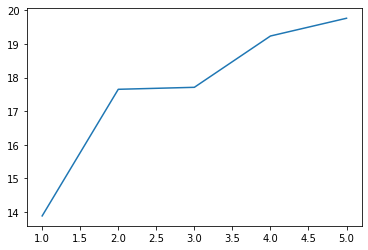

In [19]:
import matplotlib.pyplot as plt
plt.plot([n for (n,_) in times],[t for (_,t) in times])
plt.show()

## Tests

In [10]:
x_test_small = x_test[:100,::]
y_test_small = y_test[:100,::]

true = np.argmax(y_test_small,axis=1)
preds = np.argmax(model.predict(x_test_small),axis=1)

with elapsed_timer() as elapsed:
    preds_mapper = np.argmax(mapper_predict(x_test_small),axis=1)
print(elapsed())

# print(preds)
# print(preds_mapper)
# print(true)

print("accuracy: nnet: {}, mapper: {}".format(np.sum(preds==true)/len(true),np.sum(preds_mapper==true)/len(true)))

ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:885 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 3688 but received input with shape [None, 5070]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

i=50
img=x_test[i]
pred_nn=np.argmax(model.predict(np.array([img])))
pred_map=np.argmax(mapper_predict(np.array([img])))
plt.imshow(np.squeeze(img), cmap = 'Greys')
plt.title("label={}, pred_nn={}, pred_map={}".format(np.argmax(y_test[i]),pred_nn,pred_map))
plt.show()

In [ ]:
from igraph import *
g=mapper.mappers[0].graphs[0]
layout = g.layout("rt_circular")
plot(g, layout = layout)